# Capstone Project

## *Pulling Audio Information from Spotify*

This notebook contains testing for functions pulling and formatting information from spotify API for use in streamlit demo app.

#### Table of Contents

* [Function to Pull Audio Features for Album](#write-function)

* [Test Case: Luckier by Half - Dalton & the Sheriffs](#test-dalton)

### Import Libraries & Read in Data

In [1]:
## standard imports 
import pandas as pd 
import numpy as np
import seaborn as sns

import datetime as dt

import re
## visualizations
import matplotlib.pyplot as plt

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# ## options
# import sklearn
# pd.options.display.max_rows = 4000
# pd.options.display.max_columns = 100
# pd.set_option('max_colwidth', 100)

### Spotify Credentials - must be set in local environment to run
auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)

## Function to Pull Audio Features for Album<a class="anchor" id="write-function"></a>
<hr/>

The following function pulls audio features and popularity for a given album on Spotify. 

The first version (commented below) initially used the `album_tracks` method from the Spotipy API. It was discovered that this returns a 'simplifiied' version of the track information which did not include a track's popularity. The function was rewritten to pull track information separately so that the popularity feature could be collected and combined with the audio features for each track.

In [2]:
def album_audio_features(ID):
    album_tracks_list = sp.album_tracks(ID, market='US')['items']
    
    album_tracks_URI = [album_tracks_list[i].get('uri') for i in range(len(album_tracks_list))]

    track_list = []
    
    raw_track_list = sp.tracks(album_tracks_URI, market='US')['tracks']
    
    track_list = []
    
    for i in range(len(raw_track_list)):
        track_info = [raw_track_list[i].get('name'), raw_track_list[i].get('track_number'), raw_track_list[i].get('uri'), raw_track_list[i].get('popularity')]
        track_list.append(track_info)

    track_info_df = pd.DataFrame(track_list, columns=['track_name', 'track_number', 'track_uri', 'popularity'])

    track_audio_features = sp.audio_features(tracks=track_info_df['track_uri'].values.tolist())

    audio_features_df = pd.DataFrame.from_dict(track_audio_features)

    drop_cols = ['type', 'id', 'uri', 'track_href', 'analysis_url']

    audio_features_df.drop(columns = drop_cols, inplace=True)

    album_df = pd.concat([track_info_df, audio_features_df], axis=1)
    
    return album_df

## Test Case: Luckier by Half - Dalton & the Sheriffs<a class="anchor" id="test-dalton"></a>
<hr/>

Here we're testing the function written above as well as doing some basic EDA on the audio features for the album.

### Pull audio feature information from Spotify

In [3]:
### Spotify ID: ALBUM - Luckier by Half 
ID = '1v8tMGSGAsAn4KD78DFLq8'

In [4]:
luckier = album_audio_features(ID)
luckier

,track_name,track_number,track_uri,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Tell It Plain,1,spotify:track:69hE9a6camKM2ZALPfckIV,14,0.401,0.810,10,-5.582,1,0.0505,0.001280,0.041400,0.0770,0.338,159.795,243133,4
1,Cheap Seats,2,spotify:track:2pc4JumxjDqZ1b7DPwX33v,11,0.532,0.927,2,-5.255,1,0.0403,0.000868,0.009080,0.3700,0.707,100.024,231867,4
2,California Kid,3,spotify:track:6xaqmNbSGCmjEjiWyEwvA0,9,0.446,0.940,7,-5.263,1,0.0683,0.001020,0.073500,0.2990,0.386,127.941,186333,4
3,The Strummer,4,spotify:track:3E39MkTSUbIds3lY1wcfnL,11,0.326,0.995,7,-3.644,1,0.3500,0.000531,0.389000,0.0548,0.429,216.020,186133,4
4,Holding On,5,spotify:track:4vciFvUV0oLrkKrWrl00dS,11,0.594,0.858,7,-5.757,1,0.0264,0.000470,0.235000,0.1420,0.431,99.999,209400,4
5,Sunday Nights,6,spotify:track:09ybluJcnqeOE39ONdB7Hc,13,0.161,0.961,7,-5.220,1,0.1090,0.000077,0.745000,0.2410,0.298,179.840,217427,4
6,Boston,7,spotify:track:4HJ7mSMtHAdU55lLjGE4zW,15,0.541,0.921,11,-5.250,1,0.0443,0.000520,0.078400,0.1590,0.613,99.980,223440,4
7,Hand-Me-Down,8,spotify:track:3b9nCGWTyf7bTRKPvyC9S8,8,0.296,0.838,0,-6.671,1,0.0375,0.000157,0.130000,0.1400,0.287,98.950,171227,4
8,80 Good,9,spotify:track:3Rt4CW4KLTNlVlpkrfuixM,7,0.411,0.874,1,-5.352,1,0.0356,0.005490,0.432000,0.0995,0.514,179.930,188627,4
9,Her Good Name,10,spotify:track:4tXJMxK2K4ITXRH6z9M26L,8,0.450,0.599,11,-7.444,1,0.0273,0.060100,0.044700,0.1020,0.380,80.647,222880,4


## Plot Audio Features Bar Chart
<hr/>

In [5]:
def plot_audio_features(df, artist_name, album_name):
    df = df.iloc[::-1]
    ### Horizontal subplots
    df.plot.barh(
        x = 'track_name',
        y = ['valence','energy', 'danceability'],
        ylim = [0,1], 
        sharey = True,
        subplots = True, 
        layout = (1,3),
        figsize = (15,5),
        legend = False, 
        title = f'{artist_name} - {album_name}', 
        xlabel = 'Track Name')

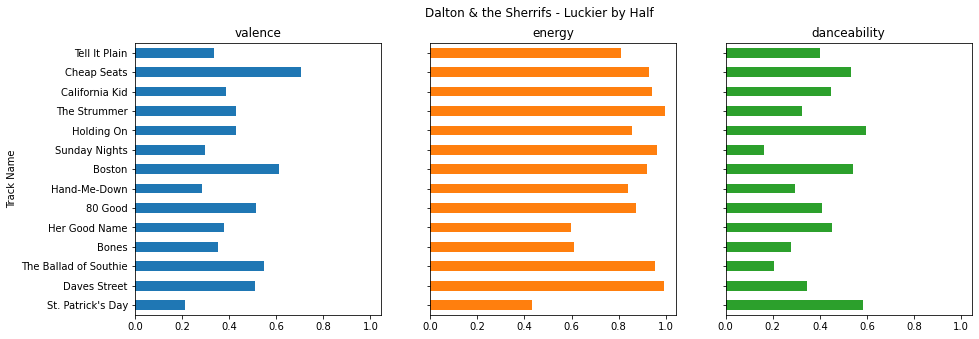

In [6]:
plot_audio_features(luckier, 'Dalton & the Sherrifs', 'Luckier by Half')

In [7]:
# luckier.columns

In [8]:
# luckier.info()

## Convert Track Duration into M:S
<hr/>

In [15]:
def convert_duration(time_ms):
    secs = int((time_ms/1000)%60)
    if secs < 10:
        secs = str('0') + str(secs)
    mins = int((time_ms/(1000*60))%60)
    mins_secs = str(mins) + ':' + str(secs)
    return mins_secs

In [32]:
convert_duration(243133)

4 03 4:03


'4:03'

In [11]:
df_track_list = luckier[['track_number', 'track_name']].copy()
# df_track_list

In [16]:
df_track_list['Time'] = luckier['duration_ms'].apply(convert_duration)

In [17]:
df_track_list

,track_number,track_name,Time
0,1,Tell It Plain,4:03
1,2,Cheap Seats,3:51
2,3,California Kid,3:06
3,4,The Strummer,3:06
4,5,Holding On,3:29
5,6,Sunday Nights,3:37
6,7,Boston,3:43
7,8,Hand-Me-Down,2:51
8,9,80 Good,3:08
9,10,Her Good Name,3:42


### Get album Artwork

In [21]:
album_object = sp.album(ID)

In [23]:
album_object.keys()

dict_keys(['album_type', 'artists', 'available_markets', 'copyrights', 'external_ids', 'external_urls', 'genres', 'href', 'id', 'images', 'label', 'name', 'popularity', 'release_date', 'release_date_precision', 'total_tracks', 'tracks', 'type', 'uri'])

In [20]:
album_object['images']

[{'height': 640,
  'url': 'https://i.scdn.co/image/ab67616d0000b273388feb546609171eae74dbad',
  'width': 640},
 {'height': 300,
  'url': 'https://i.scdn.co/image/ab67616d00001e02388feb546609171eae74dbad',
  'width': 300},
 {'height': 64,
  'url': 'https://i.scdn.co/image/ab67616d00004851388feb546609171eae74dbad',
  'width': 64}]

In [25]:
album_artwork = album_object['images'][1]['url']

'https://i.scdn.co/image/ab67616d00001e02388feb546609171eae74dbad'

In [26]:
album_pop = album_object['popularity']

22

In [29]:
album_artist = album_object['artists'][0]['name']

In [30]:
album_object['genres']

[]

In [38]:
released = album_object['release_date']
released

'2020-07-08'

In [46]:
# dt.datetime(released).strft('%B%d%Y')
dt.datetime.strptime(released,'%Y-%m-%d').strftime('%B %d, %Y')

'July 08, 2020'

In [32]:
album_object['name']

'Luckier by Half'

In [ ]:
sp.search()